In [2]:
!pip install opencv-python==3.4.8.29

In [182]:
import cv2
import cv
import pandas as pd

In [183]:
import numpy as np
import matplotlib.pyplot as plt

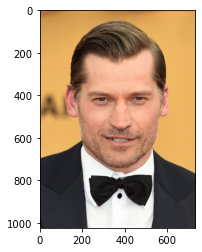

In [184]:
img = plt.imread('Jamie_Before.jpg')
plt.imshow(img)

In [185]:
nosecascade = cv2.CascadeClassifier('Nose18x15.xml')
eyescascade = cv2.CascadeClassifier('frontalEyes35x16.xml')

In [186]:
eye = eyescascade.detectMultiScale(img)[0]
print(eye)

[218 349 317 145]


In [187]:
nose = nosecascade.detectMultiScale(img,1.5)[0]
print(nose)

[308 476 137 114]


In [188]:
eye_x,eye_y,eye_w,eye_h = eye
nose_x,nose_y,nose_w,nose_h = nose

In [189]:
#img = cv2.rectangle(img,(eye_x,eye_y),(eye_x+eye_w,eye_y+eye_h),(255,255,255),2)
#plt.imshow(img)


In [190]:
#img = cv2.rectangle(img,(nose_x,nose_y),(nose_x+nose_w,nose_y+nose_h),(255,255,255),2)
#plt.imshow(img)

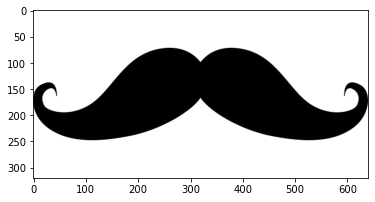

In [191]:
mustache = plt.imread('mustache.png')
plt.imshow(mustache)

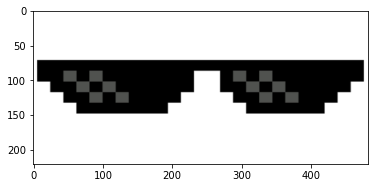

In [192]:
glass = plt.imread('glasses.png')
plt.imshow(glass)

In [193]:
glasses = cv2.resize(glass,(eye_w,eye_h))
glasses.shape

(145, 317, 4)

In [194]:
glasses = cv2.resize(glass,(eye_w,eye_h))
glasses.shape


(145, 317, 4)

In [195]:
mustaches = cv2.resize(mustache,(nose_w,nose_h))
mustaches.shape

(114, 137, 4)

In [196]:
img = img.copy()

In [197]:
for i in range(glasses.shape[0]):
    for j in range(glasses.shape[1]):
        if glasses[i,j,3]>0:
            img[eye_y+i,eye_x+j,:]=glass[i,j,:-1]

In [198]:
for i in range(mustaches.shape[0]):
    x = i+5
    for j in range(mustaches.shape[1]):
        y = j+5
        if mustaches[i,j,3]>0:
            img[nose_y+x,nose_x+y,:]=mustache[x,y,:-1]

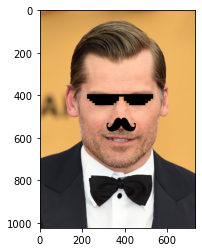

In [199]:
plt.imshow(img)

In [200]:
img = img.copy()

In [201]:
img = img.reshape((-1,3))
img.shape

(750592, 3)

In [202]:
df = pd.DataFrame(img, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred_snapchat.csv", index=False)